In [1]:
import matplotlib.pyplot as plt
import os

In [34]:
# get path to current directory (it's a ipynb file)
CURRENT_DIR = os.getcwd()

input_path = os.path.join(CURRENT_DIR, "..", "..", "input", "raw", "color.raw")
compressed_path = os.path.join(CURRENT_DIR, "..", "..", "compressed", "color_compressed.bin")

In [35]:
input_size = os.path.getsize(input_path)
compressed_size = os.path.getsize(compressed_path)
k = input_size / compressed_size
k

1.9999862559063435

In [39]:
# Q = 100
# FULL COMPRESSION: 11.739450733289742
# WITHOUT DOWNSAMPLING: 9.031208046018312
# WITHOUT DCT: 5.361484566949595
# WITHOUT QUANTIZATION: 4.35237862854984
# WITHOUT ENTROPY CIMPRESSION: 1.9999862559063435

# Q = 50
# FULL COMPRESSION: 14.331652118020278
# WITHOUT DOWNSAMPLING: 11.462659773384024
# WITHOUT DCT: 7.842117078802112
# WITHOUT QUANTIZATION: 4.35237862854984
# WITHOUT ENTROPY COMPRESSION: 1.9999862559063435

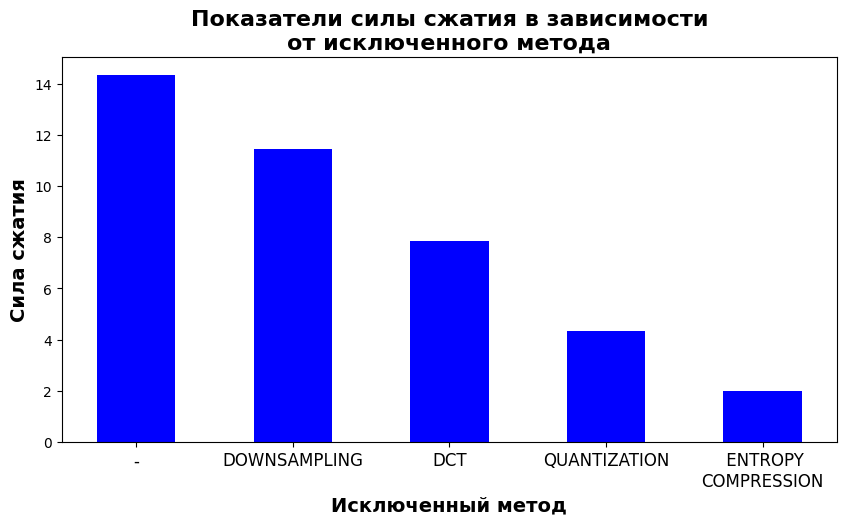

In [12]:
VALUES = [14.331652118020278, 11.462659773384024, 7.842117078802112, 4.35237862854984, 1.9999862559063435]
LABELS = ['-', 'DOWNSAMPLING', 'DCT', 'QUANTIZATION', ' ENTROPY\nCOMPRESSION']
plt.figure(figsize=(10, 5))
plt.bar(LABELS, VALUES, color='blue', width=0.5)
plt.xticks(fontsize=12, color='black')
plt.ylabel("Сила сжатия", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Исключенный метод", fontsize=14, fontweight='bold', color='black')
plt.title("Показатели силы сжатия в зависимости\nот исключенного метода", fontsize=16, fontweight="bold", color='black')
plt.show()

Q = 10. k = 29.844
Q = 20. k = 22.634
Q = 30. k = 20.383
Q = 40. k = 20.247
Q = 50. k = 15.515
Q = 60. k = 14.593
Q = 70. k = 16.737
Q = 80. k = 16.551
Q = 90. k = 16.63
Q = 100. k = 16.733


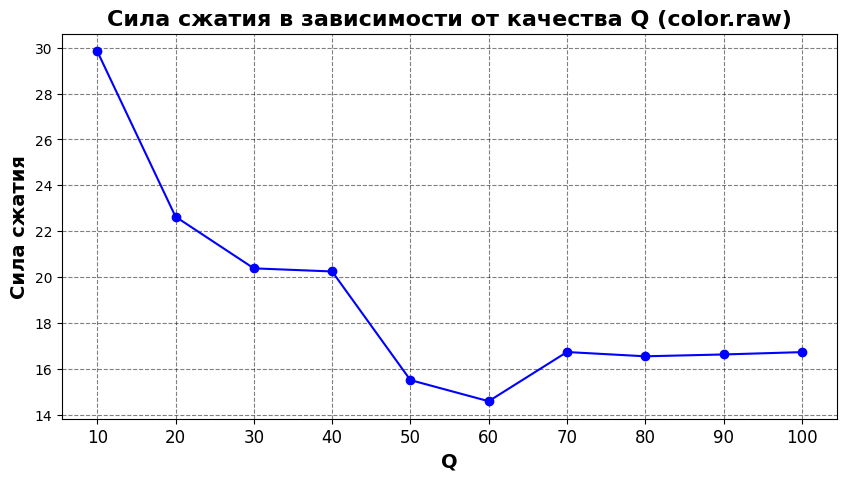

In [3]:
img = "color"

INPUT_RAW_DIRECTORY = os.path.join(os.getcwd(), "..", "..", "input", "raw")
OUTPUT_DIRECTORY = os.path.join(os.getcwd(), "..", "..", "output")

SOURCE = os.path.join(INPUT_RAW_DIRECTORY, f"{img}.raw")
COMPRESSED_PATHS = [os.path.join(OUTPUT_DIRECTORY, f"{img}_restored_Q{i}.jpg") for i in range(10, 110, 10)]

COMPRESSION_COEFFS = [(os.path.getsize(SOURCE) / os.path.getsize(comp_path)) for comp_path in COMPRESSED_PATHS]
LABELS = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']

for label, coeff in zip(LABELS, COMPRESSION_COEFFS):
    print(f"Q = {label}. k = {round(coeff, 3)}")

plt.figure(figsize=(10, 5))
plt.plot(LABELS, COMPRESSION_COEFFS, color='blue', marker='o')
plt.xticks(fontsize=12, color='black')
plt.ylabel("Сила сжатия", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Q", fontsize=14, fontweight='bold', color='black')
plt.title(f"Сила сжатия в зависимости от качества Q ({img}.raw)", fontsize=16, fontweight="bold", color='black')
plt.grid(True, color='black', linestyle='--', alpha=0.5)
plt.show()

In [4]:
from PIL import Image

Q = 10. k = 651571
Q = 20. k = 577667
Q = 30. k = 481686
Q = 40. k = 401883
Q = 50. k = 364999
Q = 60. k = 289441
Q = 70. k = 208143
Q = 80. k = 147787
Q = 90. k = 80289
Q = 100. k = 29377


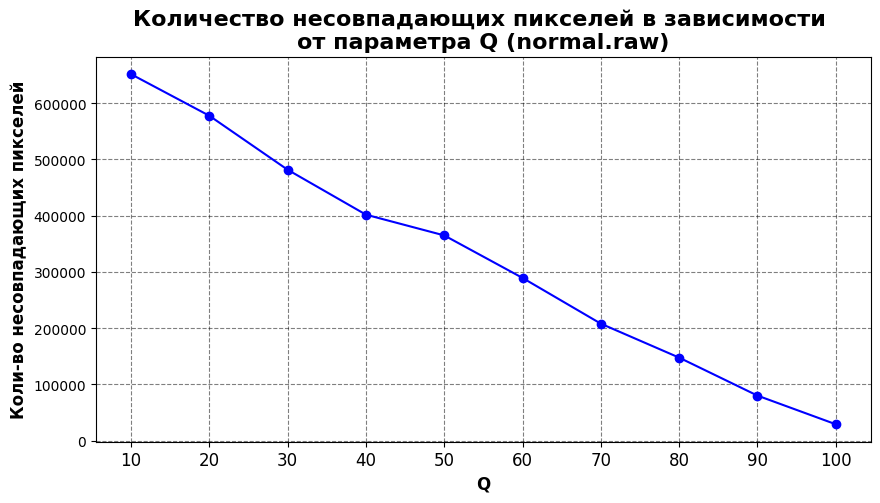

In [18]:
img = "normal"

INPUT_JPG_DIRECTORY = os.path.join(os.getcwd(), "..", "..", "input", "jpg")
OUTPUT_DIRECTORY = os.path.join(os.getcwd(), "..", "..", "output")

SOURCE = os.path.join(INPUT_JPG_DIRECTORY, f"{img}.jpg")
COMPRESSED_PATHS = [os.path.join(OUTPUT_DIRECTORY, f"{img}_restored_Q{i}.jpg") for i in range(10, 110, 10)]

LABELS = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
# calculate the number of pixels that differ from the corresponding pixels in the source image
COEFFS = []
threshold = 60
original_pixels = list(Image.open(SOURCE).getdata())
for comp_path in COMPRESSED_PATHS:
    compressed_pixels = list(Image.open(comp_path).getdata())
    coeff = 0
    for o, c in zip(original_pixels, compressed_pixels):
        if (abs((o[0] + o[1] + o[2]) - (c[0] + c[1] + c[2])) > threshold):
            coeff += 1
    COEFFS.append(coeff)

for label, coeff in zip(LABELS, COEFFS):
    print(f"Q = {label}. k = {round(coeff, 3)}")

plt.figure(figsize=(10, 5))
plt.plot(LABELS, COEFFS, color='blue', marker='o')
plt.xticks(fontsize=12, color='black')
plt.ylabel("Коли-во несовпадающих пикселей", fontsize=12, fontweight='bold', color='black')
plt.xlabel("Q", fontsize=12, fontweight='bold', color='black')
plt.title(f"Количество несовпадающих пикселей в зависимости \nот параметра Q ({img}.raw)", fontsize=16, fontweight="bold", color='black')
plt.grid(True, color='black', linestyle='--', alpha=0.5)
plt.show()